# STEPS TO BE FOLLOWED
#1.COLLECT DATA OF THE STOCKS OF APPLE COMPANY FORM 2000 TO THE PRESENT DATE
#2.PROCESS THE DATA-TRAIN AND TEST
#3.CREATE A STACKED LSTM MODEL
#4.PREDICT THE TEST DATA AND PLOT THE OUTPUT
#5.PREDICT THE FUTURE 30 DAYS AND PLOT THE OUTPUT

to learn more about lstm refer https://colah.github.io/posts/2015-08-Understanding-LSTMs/

youtube video for reference https://www.youtube.com/watch?v=H6du_pfuznE

link for timeseries prediction:https://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/

In [2]:
import pandas as pd

In [7]:

pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [15]:
### Data Collection
import pandas_datareader as pdr
key="5a6d133833ad6240d8272dc603e273bdfbc19af2"
##THE KEY HERE IS AUTHENTIC AND NOT ALL HAVE THE SAME KEY 
##YOU NEED TO GO TO THE TIINGO WEBSITE AND GET YOU KEY

LINK FOR THE TIINGO WEBSITE:https://api.tiingo.com/documentation/general/overview

In [17]:
df = pdr.get_data_tiingo('AAPL', api_key=key)
#HERE WE ARE TAKING THE STOCKS OF APPLE WE CAN TAKE ANY COMPANY BUT HERE AAPL REFERS TO APPLE

In [18]:
df.to_csv('AAPL.csv') #CONVERTING TO CSV FORMAT

In [20]:
df

close      high     low    open     volume  \
symbol date                                                                     
AAPL   2015-09-28 00:00:00+00:00  112.44  114.5700  112.44  113.85   50782189   
       2015-09-29 00:00:00+00:00  109.06  113.5100  107.86  112.83   73365384   
       2015-09-30 00:00:00+00:00  109.95  111.5400  108.73  110.17   65041596   
       2015-10-01 00:00:00+00:00  109.58  109.6200  107.31  109.07   63929100   
       2015-10-02 00:00:00+00:00  110.38  111.0136  107.55  108.01   58019758   
...                                  ...       ...     ...     ...        ...   
       2020-09-21 00:00:00+00:00  110.08  110.1900  103.10  104.54  195713815   
       2020-09-22 00:00:00+00:00  111.81  112.8600  109.16  112.68  183055373   
       2020-09-23 00:00:00+00:00  107.12  112.1100  106.77  111.62  150718671   
       2020-09-24 00:00:00+00:00  108.22  110.2500  105.00  105.17  167743349   
       2020-09-25 00:00:00+00:00  112.28  112.4400  107.67  108.43  149981441   

                                    adjClose     adjHigh      adjLow  \
symbol date                                                            
AAPL   2015-09-28 00:00:00+00:00   25.973102   26.465122   25.973102   
       2015-09-29 00:00:00+00:00   25.192338   26.220267   24.915144   
       2015-09-30 00:00:00+00:00   25.397924   25.765206   25.116110   
       2015-10-01 00:00:00+00:00   25.312456   25.321696   24.788097   
       2015-10-02 00:00:00+00:00   25.497252   25.643610   24.843535   
...                                      ...         ...         ...   
       2020-09-21 00:00:00+00:00  110.080000  110.190000  103.100000   
       2020-09-22 00:00:00+00:00  111.810000  112.860000  109.160000   
       2020-09-23 00:00:00+00:00  107.120000  112.110000  106.770000   
       2020-09-24 00:00:00+00:00  108.220000  110.250000  105.000000   
       2020-09-25 00:00:00+00:00  112.280000  112.440000  107.670000   

                                     adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                    
AAPL   2015-09-28 00:00:00+00:00   26.298805  203128756      0.0          1.0  
       2015-09-29 00:00:00+00:00   26.063190  293461536      0.0          1.0  
       2015-09-30 00:00:00+00:00   25.448743  260166384      0.0          1.0  
       2015-10-01 00:00:00+00:00   25.194648  255716400      0.0          1.0  
       2015-10-02 00:00:00+00:00   24.949793  232079032      0.0          1.0  
...                                      ...        ...      ...          ...  
       2020-09-21 00:00:00+00:00  104.540000  195713815      0.0          1.0  
       2020-09-22 00:00:00+00:00  112.680000  183055373      0.0          1.0  
       2020-09-23 00:00:00+00:00  111.620000  150718671      0.0          1.0  
       2020-09-24 00:00:00+00:00  105.170000  167743349      0.0          1.0  
       2020-09-25 00:00:00+00:00  108.430000  149981441      0.0          1.0  

[1259 rows x 12 columns]

In [21]:
import pandas as pd

In [22]:
df=pd.read_csv('AAPL.csv') #reading th csv file using pandas read_csv so that we can have more operation to be done

In [23]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-09-28 00:00:00+00:00,112.44,114.5700,112.44,113.85,50782189,25.973102,26.465122,25.973102,26.298805,203128756,0.0,1.0
1,AAPL,2015-09-29 00:00:00+00:00,109.06,113.5100,107.86,112.83,73365384,25.192338,26.220267,24.915144,26.063190,293461536,0.0,1.0
2,AAPL,2015-09-30 00:00:00+00:00,109.95,111.5400,108.73,110.17,65041596,25.397924,25.765206,25.116110,25.448743,260166384,0.0,1.0
3,AAPL,2015-10-01 00:00:00+00:00,109.58,109.6200,107.31,109.07,63929100,25.312456,25.321696,24.788097,25.194648,255716400,0.0,1.0
4,AAPL,2015-10-02 00:00:00+00:00,110.38,111.0136,107.55,108.01,58019758,25.497252,25.643610,24.843535,24.949793,232079032,0.0,1.0


In [24]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2020-09-21 00:00:00+00:00,110.08,110.19,103.10,104.54,195713815,110.08,110.19,103.10,104.54,195713815,0.0,1.0
1255,AAPL,2020-09-22 00:00:00+00:00,111.81,112.86,109.16,112.68,183055373,111.81,112.86,109.16,112.68,183055373,0.0,1.0
1256,AAPL,2020-09-23 00:00:00+00:00,107.12,112.11,106.77,111.62,150718671,107.12,112.11,106.77,111.62,150718671,0.0,1.0
1257,AAPL,2020-09-24 00:00:00+00:00,108.22,110.25,105.00,105.17,167743349,108.22,110.25,105.00,105.17,167743349,0.0,1.0
1258,AAPL,2020-09-25 00:00:00+00:00,112.28,112.44,107.67,108.43,149981441,112.28,112.44,107.67,108.43,149981441,0.0,1.0


In [25]:
#we can check here that we have stock from 28th septmebr 2015 to today 
#tingo gives us the stocks till today 

In [26]:
df1=df.reset_index()['close']

In [27]:
df1

0       112.44
1       109.06
2       109.95
3       109.58
4       110.38
         ...  
1254    110.08
1255    111.81
1256    107.12
1257    108.22
1258    112.28
Name: close, Length: 1259, dtype: float64

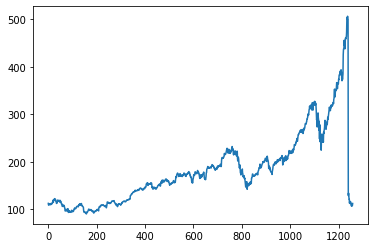

In [28]:
import matplotlib.pyplot as plt
plt.plot(df1)

link for maxmin scalar:https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#:~:text=MinMaxScaler%20(feature_range%3D(0%2C%201,X_std%20%3D%20(X%20%2D%20X.
 LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [31]:
import numpy as np

In [32]:
df1

0       112.44
1       109.06
2       109.95
3       109.58
4       110.38
         ...  
1254    110.08
1255    111.81
1256    107.12
1257    108.22
1258    112.28
Name: close, Length: 1259, dtype: float64

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
#we are using minmaxscalar and transforming all the data  into the range of 0and 1

In [35]:
print(df1)

[[0.05315695]
 [0.04502706]
 [0.04716777]
 ...
 [0.04036079]
 [0.04300661]
 [0.0527721 ]]


In [37]:
#as we can see all the data is in the range 0 and 1
#now we do some data prepreocessing and divide the data set into training and test dataset
#we give 65 percent of the data into the  training set and the reaminigto the test data set

In [38]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [40]:
#lets check the training and the test data set sizes 
training_size,test_size

(818, 441)

In [41]:
train_data

array([[0.05315695],
       [0.04502706],
       [0.04716777],
       [0.04627781],
       [0.04820204],
       [0.04916416],
       [0.05043897],
       [0.04916416],
       [0.04608539],
       [0.05238725],
       [0.0511365 ],
       [0.05159351],
       [0.04779314],
       [0.05176188],
       [0.04978954],
       [0.05144919],
       [0.05635598],
       [0.05633193],
       [0.06051714],
       [0.06912808],
       [0.05998797],
       [0.05823211],
       [0.06958509],
       [0.07261575],
       [0.0701383 ],
       [0.07417919],
       [0.07752255],
       [0.07615153],
       [0.07355382],
       [0.07389056],
       [0.07271197],
       [0.06357186],
       [0.06198437],
       [0.0610463 ],
       [0.05291642],
       [0.05733013],
       [0.05616356],
       [0.06482261],
       [0.06840649],
       [0.06965725],
       [0.06592904],
       [0.06864702],
       [0.06660253],
       [0.06607336],
       [0.06725195],
       [0.06494287],
       [0.06239327],
       [0.059

In [42]:
test_data

array([[0.15829224],
       [0.15848467],
       [0.16211666],
       [0.16254961],
       [0.12471437],
       [0.13931449],
       [0.13852075],
       [0.14530367],
       [0.15146121],
       [0.15263981],
       [0.14900782],
       [0.1434997 ],
       [0.15088394],
       [0.15538184],
       [0.15759471],
       [0.15990379],
       [0.15143716],
       [0.15292844],
       [0.14999399],
       [0.16216476],
       [0.15865304],
       [0.15475646],
       [0.1801804 ],
       [0.18304269],
       [0.18323512],
       [0.19461215],
       [0.20165965],
       [0.20180397],
       [0.19386651],
       [0.1925917 ],
       [0.19023452],
       [0.19374624],
       [0.19203848],
       [0.19352977],
       [0.19261575],
       [0.19384245],
       [0.19648827],
       [0.19415514],
       [0.19874925],
       [0.20177992],
       [0.20202044],
       [0.2033193 ],
       [0.1991822 ],
       [0.20355983],
       [0.20567649],
       [0.20490679],
       [0.20247745],
       [0.197

In [43]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [47]:
#since this is inspired from the time series project whose link is given at thetop of the code 
#we have to convert the data into timeseries here we are using a timestep as 100

In [48]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)


In [49]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [50]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [51]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

The input of the LSTM is always is a 3D array. (batch_size, time_steps,seq_len) . The output of the LSTM could be a 2D array or 3D array depending upon the return_sequences argumen 
link to refer the input and output of the lsrm:https://mc.ai/understanding-input-and-output-shape-in-lstm-keras/#:~:text=The%20input%20of%20the%20LSTM,depending%20upon%20the%20return_sequences%20argument.

In [52]:
#as we already wrote in the beginnig that we are going to use lstm as the algorithm for predicting the stock prics 
#we need to build a stcaked lstm model

In [53]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [54]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
##building a model

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [63]:
#fitting the model to training data set usign 100 epoch 

In [64]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 2s 157ms/step - loss: 4.8612e-05 - val_loss: 0.0039
Epoch 2/100
12/12 [==============================] - 2s 164ms/step - loss: 5.0059e-05 - val_loss: 0.0038
Epoch 3/100
12/12 [==============================] - 2s 157ms/step - loss: 5.4769e-05 - val_loss: 0.0036
Epoch 4/100
12/12 [==============================] - 2s 158ms/step - loss: 5.3872e-05 - val_loss: 0.0033
Epoch 5/100
12/12 [==============================] - 2s 195ms/step - loss: 4.1980e-05 - val_loss: 0.0035
Epoch 6/100
12/12 [==============================] - 2s 189ms/step - loss: 3.6667e-05 - val_loss: 0.0034
Epoch 7/100
12/12 [==============================] - 2s 175ms/step - loss: 3.7341e-05 - val_loss: 0.0035
Epoch 8/100
12/12 [==============================] - 2s 191ms/step - loss: 3.4679e-05 - val_loss: 0.0035
Epoch 9/100
12/12 [==============================] - 2s 154ms/step - loss: 4.0455e-05 - val_loss: 0.0034
Epoch 10/100
12/12 [==============================] - 2

In [65]:
import tensorflow as tf

In [66]:
tf.__version__

'2.3.0'

In [67]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [68]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [69]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.005738708984614736

In [70]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.0648010434868685

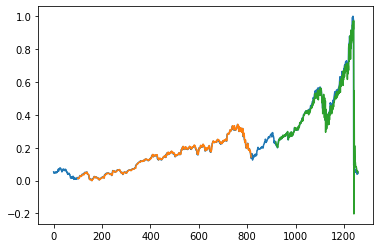

In [72]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [73]:
#here the ornage one indicates the training data while the green indicates the test data and the blue represents the entire datset

In [74]:
len(test_data)

441

In [75]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [89]:
x_input=test_data[341:].reshape(1,-1)

In [90]:
x_input.shape

(1, 100)

In [87]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [77]:
temp_input

[0.5058087793144919,
 0.5132892363199038,
 0.5286590499098016,
 0.5403968731208659,
 0.5317378232110643,
 0.5226939266386048,
 0.5272399278412507,
 0.5228382441371016,
 0.5402766085387853,
 0.5358989777510523,
 0.5505472038484667,
 0.5448226097414313,
 0.5497294046903187,
 0.5445339747444378,
 0.5478532772098617,
 0.5481900180396873,
 0.5474443776307878,
 0.5568490679494889,
 0.5604329524954901,
 0.5647143716175587,
 0.5579795550210462,
 0.5800601322910404,
 0.584774503908599,
 0.6101022248947685,
 0.6313890559230306,
 0.5906434155141311,
 0.5976187612748045,
 0.607696933253157,
 0.6295610342754059,
 0.6283824413710162,
 0.628719182200842,
 0.6238845460012028,
 0.6458929645219482,
 0.6643174984966926,
 0.6487552615754661,
 0.6602525556223691,
 0.6332892363199039,
 0.6528923631990378,
 0.6601563439567049,
 0.6584966927239928,
 0.6584966927239928,
 0.6819242333132893,
 0.6791340950090199,
 0.7000120264582081,
 0.7039567047504509,
 0.7055682501503309,
 0.7013108839446784,
 0.7165123271196

PREDICTING FOR THE NEXT 10DAYS

In [79]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [ 0.62871918  0.62388455  0.64589296  0.6643175   0.64875526  0.66025256
  0.63328924  0.65289236  0.66015634  0.65849669  0.65849669  0.68192423
  0.6791341   0.70001203  0.7039567   0.70556825  0.70131088  0.71651233
  0.72293446  0.711365    0.70948888  0.72901984  0.71595911  0.71858088
  0.67598316  0.67377029  0.69488876  0.67990379  0.69710162  0.70816597
  0.80505111  0.83081179  0.83781118  0.8416356   0.87858088  0.85173782
  0.86727601  0.83502105  0.86999399  0.88923632  0.88825015  0.8853638
  0.89455201  0.89594708  0.92064943  0.97929044  0.99360192  0.98366807
  1.          0.98544799  0.9834997   0.09308479  0.10544799  0.09876127
  0.07345761  0.07365003  0.05407096  0.06489477  0.0556825   0.05209862
  0.06016837  0.06061335  0.0524113   0.04810583  0.03968731  0.04748046
  0.05164161  0.04036079  0.04300661  0.0527721   0.05086324  0.04902828
  0.04552101  0.04047499  0.03401808  0.02627762  0.01737787  0.0074369
 -0.00343249 -0.01511916 -0.02750841 -0.0

In [80]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
#ARRNAGING THE DATA

In [81]:
import matplotlib.pyplot as plt

In [82]:
len(df1)

1259

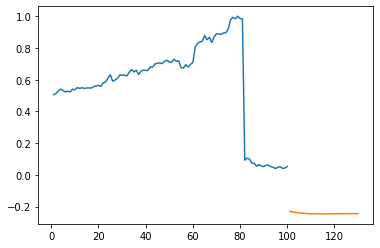

In [95]:
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [96]:
#HERE ORANGE LINE INDICATES THE PREDICTION FOR NEXT 30 DAYS

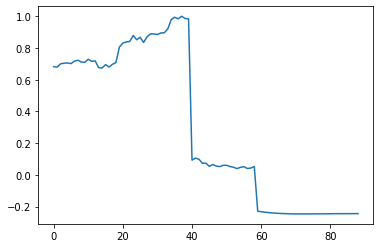

In [97]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [98]:
df3=scaler.inverse_transform(df3).tolist()

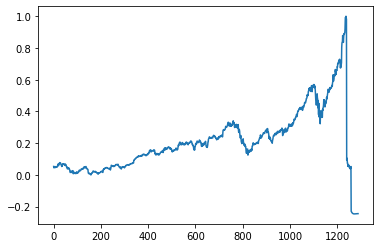

In [99]:
plt.plot(df3)

YOU CAN IMPROVE THIS BY USING 
1.INCREASING THE TIMESTAMP
2.USE BIDIRECTIONLA LSTM 